***Hill Climbing Search***

* Hill Climbing is a heuristic search used for mathematical optimization problems in the field of Artificial Intelligence. 
* Given a large set of inputs and a good heuristic function, it tries to find a sufficiently good solution to the problem.
* This solution may not be the global optimal maximum.

* Features of Hill Climbing
* 1. Variant of generate and test algorithm: It is a variant of generating and test algorithm. The generate and test algorithm is as follows :
        1. Generate possible solutions.
        2. Test to see if this is the expected solution.
        3. If the solution has been found quit else go to step 1. 

Hence we call Hill climbing a variant of generating and test algorithm as it takes the feedback from the test procedure. Then this feedback is utilized by the generator in deciding the next move in search space.
* 2. Uses the Greedy approach: At any point in state space, the search moves in that direction only which optimizes the cost of function with the hope of finding the optimal solution at the end.

**Types of Hill Climbing:**
 1. *Simple Hill climbing:* It examines the neighboring nodes one by one and selects the first neighboring node which optimizes the current cost as the next node.
 2. *Steepest-Ascent Hill climbing:* It first examines all the neighboring nodes and then selects the node closest to the solution state as of the next node.
 3. *Stochastic hill climbing:* It does not examine all the neighboring nodes before deciding which node to select. It just selects a neighboring node at random and decides (based on the amount of improvement in that neighbor) whether to move to that neighbor or to examine another.

*Activity 1:*
* Consider a maze as shown below. Each empty tile represents a separate node in the graph, while the walls are represented by blue tiles. Your starting node is A and the goal is to reach Y. Implement an A* search to find the resulting path.

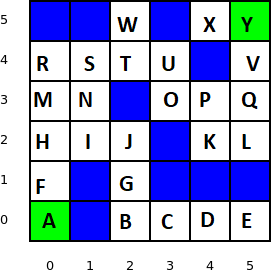

Instead of maintaining a fringe or a frontier to save the nodes that are to be explored, hill climbing just explores the best child of a given node, then explores the best grandchild of a particular child and so on and so forth.The Node class is used to represent a node in the graph.

In [1]:
import math
# Node class representing a state or city in the graph
class Node:
    def __init__(self, state, parent, actions, totalCost, heuristic):
        self.state = state  # State name
        self.parent = parent  # Parent state in the path
        self.actions = actions  # List of neighboring states with cost
        self.totalCost = totalCost  # Cost to reach this node
        self.heuristic = heuristic  # Straight-line distance to Goal

* **Euclidean Distance:** straight-line distance between two points
* ***d = √[(x2 - x1)² + (y2 - y1)²]*** 
* **Manhattan Distance:** distance along grid lines (like city blocks)
* ***d = |x2 - x1| + |y2 - y1|***

In [2]:

# Hill Climbing Algorithm
def hillclimbing():
    initialState = 'A'  # Starting point of the search
    goalState = 'Y'     # Goal point of the search

    # Graph representation with heuristic values as coordinates
    # A dictionary where keys are node names ('A', 'B', etc.), and values are Node objects
    # Heuristic Values Represent coordinates
    graph = {
        'A': Node('A', None, [('F', 1)], 0, (0,0)),
        'B': Node('B', None, [('G', 1),('C', 1)], 0, (2, 0)),
        'C': Node('C', None, [('H', 1),('D', 1)], 0, (3, 0)),
        'D': Node('D', None, [('I', 1),('E', 1)], 0, (4, 0)),
        'E': Node('E', None, [('D', 1)], 0, (5, 0)),
        'F': Node('F', None, [('A', 1),('H', 1)], 0, (0, 1)),
        'G': Node('G', None, [('B', 1),('J', 1),], 0, (2, 1)),
        'H': Node('H', None, [('F', 1),('I', 1),('M', 1)], 0, (0, 2)),
        'I': Node('I', None, [('H', 1),('J', 1),('N', 1)], 0, (1, 2)),
        'J': Node('J', None, [('G', 1),('I', 1)], 0, (2, 2)),
        'K': Node('K', None, [('L', 1),('P', 1)], 0, (4, 2)),
        'L': Node('L', None, [('K', 1),('Q', 1)], 0, (5, 2)),
        'M': Node('M', None, [('H', 1),('N', 1),('R', 1)], 0, (0, 3)),
        'N': Node('N', None, [('I', 1),('M', 1),('S', 1)], 0, (1, 3)),
        'O': Node('O', None, [('P', 1),('U', 1)], 0, (3, 3)),
        'P': Node('P', None, [('O', 1),('Q', 1)], 0, (4, 3)),
        'Q': Node('Q', None, [('L', 1),('P', 1),('V', 1)], 0, (5, 3)),
        'R': Node('R', None, [('M', 1),('S', 1)], 0, (0, 4)),
        'S': Node('S', None, [('N', 1),('R', 1),('T', 1)], 0, (1, 4)),
        'T': Node('T', None, [('S', 1),('U', 1),('W', 1)], 0, (2, 4)),
        'U': Node('U', None, [('O', 1),('T', 1)], 0, (3, 4)),
        'V': Node('V', None, [('Q', 1),('Y', 1)], 0, (5, 4)),
        'W': Node('W', None, [('T', 1)], 0, (2, 5)),
        'X': Node('X', None, [('Y', 1)], 0, (4, 5)),
        'Y': Node('Y', None, [('V', 1),('X', 1)], 0, (5, 5))
    }

    parentNode=initialState
    
    # Calculate the heuristic cost for the initial state
    # Computes the Euclidean distance from 'A' to 'Y' (i.e., straight-line distance).
    parentCost=math.sqrt(((graph[goalState].heuristic[0] - graph[initialState].heuristic[0]) ** 2) + (graph[goalState].heuristic[1] - graph[initialState].heuristic[1]) ** 2)
    
    explored=[]  # Tracks visited nodes
    solution=[]  # Stores the path to the goal state
    minChildCost=parentCost-1  # Ensures first child is considered (Initialize minimum child cost slightly less to enter loop)

    # Continues until the current node (parentNode) reaches the goal ('Y')
    while parentNode!=goalState:
        # Get the child nodes and their costs
        # # In each iteration, select the best move
        bestNode=parentNode
        minChildCost=parentCost
        explored.append(parentNode)  # # Mark current node as explored

        # Check all children (neighbors) of the current parent node
        for child in graph[parentNode].actions:
            if child[0] not in explored:
                # Calculate the heuristic cost for the child node
                childCost=math.sqrt(((graph[goalState].heuristic[0] - graph[child[0]].heuristic[0]) ** 2) +
                                 ((graph[goalState].heuristic[1] - graph[child[0]].heuristic[1]) ** 2))
            
            # Compare with current minimum cost, pick the child with smaller heuristic cost
            if childCost<minChildCost:
                bestNode=child[0]
                minChildCost=childCost

        if bestNode==parentNode:  # No better node found (local optimum)
            break
        else:
            # Move to best child
            parentNode=bestNode
            parentCost=minChildCost
            solution.append(parentNode)  # Add node to solution path
    
    return solution
            

In [3]:
solution=hillclimbing()
print(solution)

['F', 'H', 'I', 'J']


* Simple Hill Climbing

In [ ]:

# Hill Climbing Algorithm
def Hillclimbing():
    initialState = 'A'  # Starting point of the search
    goalState = 'Y'     # Goal point of the search

    # Graph representation with heuristic values as coordinates
    # A dictionary where keys are node names ('A', 'B', etc.), and values are Node objects
    # Heuristic Values Represent coordinates
    graph = {
        'A': Node('A', None, [('F', 1)], 0, (0,0)),
        'B': Node('B', None, [('G', 1),('C', 1)], 0, (2, 0)),
        'C': Node('C', None, [('H', 1),('D', 1)], 0, (3, 0)),
        'D': Node('D', None, [('I', 1),('E', 1)], 0, (4, 0)),
        'E': Node('E', None, [('D', 1)], 0, (5, 0)),
        'F': Node('F', None, [('A', 1),('H', 1)], 0, (0, 1)),
        'G': Node('G', None, [('B', 1),('J', 1),], 0, (2, 1)),
        'H': Node('H', None, [('F', 1),('I', 1),('M', 1)], 0, (0, 2)),
        'I': Node('I', None, [('H', 1),('J', 1),('N', 1)], 0, (1, 2)),
        'J': Node('J', None, [('G', 1),('I', 1)], 0, (2, 2)),
        'K': Node('K', None, [('L', 1),('P', 1)], 0, (4, 2)),
        'L': Node('L', None, [('K', 1),('Q', 1)], 0, (5, 2)),
        'M': Node('M', None, [('H', 1),('N', 1),('R', 1)], 0, (0, 3)),
        'N': Node('N', None, [('I', 1),('M', 1),('S', 1)], 0, (1, 3)),
        'O': Node('O', None, [('P', 1),('U', 1)], 0, (3, 3)),
        'P': Node('P', None, [('O', 1),('Q', 1)], 0, (4, 3)),
        'Q': Node('Q', None, [('L', 1),('P', 1),('V', 1)], 0, (5, 3)),
        'R': Node('R', None, [('M', 1),('S', 1)], 0, (0, 4)),
        'S': Node('S', None, [('N', 1),('R', 1),('T', 1)], 0, (1, 4)),
        'T': Node('T', None, [('S', 1),('U', 1),('W', 1)], 0, (2, 4)),
        'U': Node('U', None, [('O', 1),('T', 1)], 0, (3, 4)),
        'V': Node('V', None, [('Q', 1),('Y', 1)], 0, (5, 4)),
        'W': Node('W', None, [('T', 1)], 0, (2, 5)),
        'X': Node('X', None, [('Y', 1)], 0, (4, 5)),
        'Y': Node('Y', None, [('V', 1),('X', 1)], 0, (5, 5))
    }

    parentNode=initialState
    
    # Calculate the heuristic cost for the initial state
    # Computes the Euclidean distance from 'A' to 'Y' (i.e., straight-line distance).
    parentCost=math.sqrt(((graph[goalState].heuristic[0] - graph[initialState].heuristic[0]) ** 2) + (graph[goalState].heuristic[1] - graph[initialState].heuristic[1]) ** 2)
    
    explored=[]  # Tracks visited nodes
    solution=[]  # Stores the path to the goal state
  
    while parentNode != goalState:
            found_better = False
            explored.append(parentNode)

            for child in graph[parentNode].actions:
                childNode = child[0]
                if childNode not in explored:
                    childCost = math.sqrt(((graph[goalState].heuristic[0] - graph[childNode].heuristic[0]) ** 2) + (graph[goalState].heuristic[1] - graph[childNode].heuristic[1]) ** 2)

                    if childCost < parentCost:
                        # Immediately move to this better child
                        parentNode = childNode
                        parentCost = childCost
                        solution.append(parentNode)
                        found_better = True
                        break  # Simple hill climbing: take the first better neighbor

            if not found_better:
                break  # Local maximum or no better neighbor

    return solution            

In [ ]:
solution=Hillclimbing()
print(solution)

* Stochastic Hill Climbing

In [ ]:
import math
import random


def Hillclimbing():
    initialState = 'A'  # Starting point
    goalState = 'Y'     # Goal

    graph = {
        'A': Node('A', None, [('F', 1)], 0, (0,0)),
        'B': Node('B', None, [('G', 1),('C', 1)], 0, (2, 0)),
        'C': Node('C', None, [('H', 1),('D', 1)], 0, (3, 0)),
        'D': Node('D', None, [('I', 1),('E', 1)], 0, (4, 0)),
        'E': Node('E', None, [('D', 1)], 0, (5, 0)),
        'F': Node('F', None, [('A', 1),('H', 1)], 0, (0, 1)),
        'G': Node('G', None, [('B', 1),('J', 1)], 0, (2, 1)),
        'H': Node('H', None, [('F', 1),('I', 1),('M', 1)], 0, (0, 2)),
        'I': Node('I', None, [('H', 1),('J', 1),('N', 1)], 0, (1, 2)),
        'J': Node('J', None, [('G', 1),('I', 1)], 0, (2, 2)),
        'K': Node('K', None, [('L', 1),('P', 1)], 0, (4, 2)),
        'L': Node('L', None, [('K', 1),('Q', 1)], 0, (5, 2)),
        'M': Node('M', None, [('H', 1),('N', 1),('R', 1)], 0, (0, 3)),
        'N': Node('N', None, [('I', 1),('M', 1),('S', 1)], 0, (1, 3)),
        'O': Node('O', None, [('P', 1),('U', 1)], 0, (3, 3)),
        'P': Node('P', None, [('O', 1),('Q', 1)], 0, (4, 3)),
        'Q': Node('Q', None, [('L', 1),('P', 1),('V', 1)], 0, (5, 3)),
        'R': Node('R', None, [('M', 1),('S', 1)], 0, (0, 4)),
        'S': Node('S', None, [('N', 1),('R', 1),('T', 1)], 0, (1, 4)),
        'T': Node('T', None, [('S', 1),('U', 1),('W', 1)], 0, (2, 4)),
        'U': Node('U', None, [('O', 1),('T', 1)], 0, (3, 4)),
        'V': Node('V', None, [('Q', 1),('Y', 1)], 0, (5, 4)),
        'W': Node('W', None, [('T', 1)], 0, (2, 5)),
        'X': Node('X', None, [('Y', 1)], 0, (4, 5)),
        'Y': Node('Y', None, [('V', 1),('X', 1)], 0, (5, 5))
    }

    parentNode = initialState
    parentCost = math.dist(graph[goalState].heuristic, graph[parentNode].heuristic)

    explored = []
    solution = [parentNode]

    while parentNode != goalState:
        explored.append(parentNode)
        better_neighbors = []

        # Collect all better neighbors
        for child in graph[parentNode].actions:
            childNode = child[0]
            if childNode not in explored:
                childCost = math.dist(graph[goalState].heuristic, graph[childNode].heuristic)

                if childCost < parentCost:
                    better_neighbors.append((childNode, childCost))

        if not better_neighbors:
            break  # No better neighbors -> stuck at local maximum

        # Pick one better neighbor randomly
        next_node, next_cost = random.choice(better_neighbors)

        parentNode = next_node
        parentCost = next_cost
        solution.append(parentNode)

    return solution


In [ ]:
path = Hillclimbing()
print("Path found:", path)